# 2.3.6 Decision Tree Ensemble
- random forest and gradient boosting

In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

## Random Forest
- Basically, decision tree usually tends to be overfitted, random forest is substitute of it
- Make lots of decision trees and have average of them

### Build Random Forest
- First of all, we have to define the number of trees
- for build them, create 'booststrap sample' which randomly extracts data for the number of n_samples from n_samples' data point
- This data set's size is totally the same as original set but some data point is omitted or redundant.
- By this data set, create decision tree but random forest algorithm randomly selects representative feature from each node.
- In these representatives, find the best test. How many features would be selected can be amended by max_features parameter.
- Booststrap sampling make random forest trees use little bit different data sets and each prune of trees uses other features of part sets.


### Analysis of Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

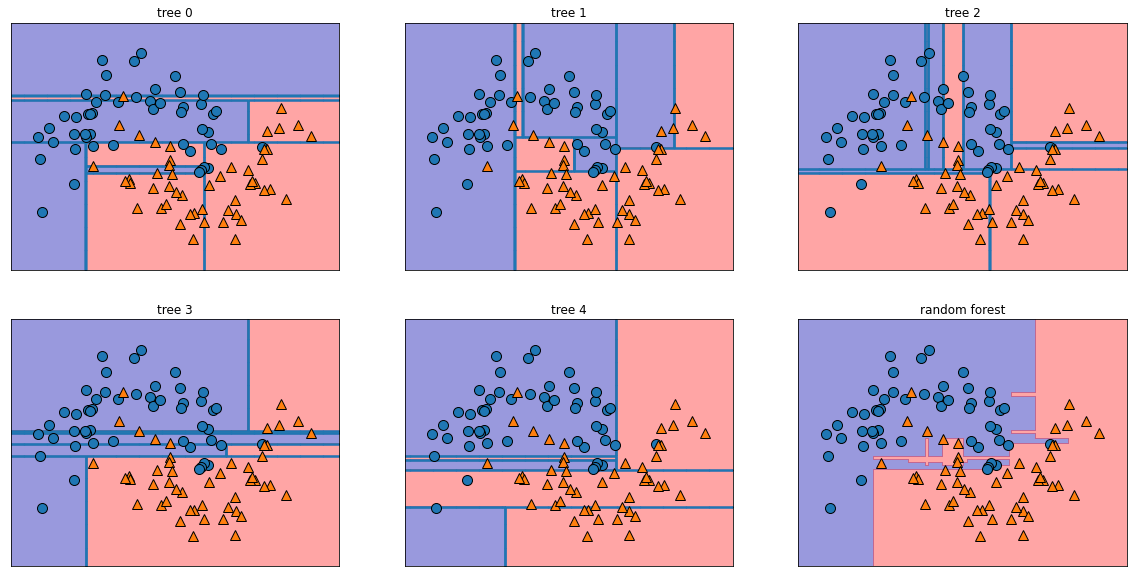

In [4]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## applying random tree on cancer data

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

training set accuracy: 1.000
test set accuracy: 0.972


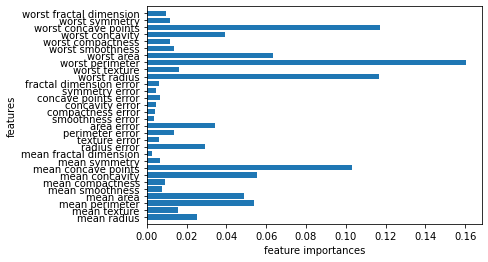

In [7]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

## Gradient boosting Regression Tree
- the name includes "regression" but this model can be used for both regression and classification
- Unlike random forest, gradient boosting subsequently create trees by a complement of before one's error
- which means, gradient boosting doesn't have a randomness but it uses a strong pre-pruning
- Basically, gradient boosting connects lots of "weak learner".
- The more trees, the better performance.
- this model is more sensitive than random forest but if amended well, it makes the higher accuracy.
- The other paramerter in gradient boosting is "how strongly corrected the value is" with learning_rate.
- The higher learning_rate, the more complex model, and the higher n_estimators value, the more trees added, the more complex model and the more opportunities to correct error in training set.


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

training set accuracy: 1.000
test set accuracy: 0.965


That training set accuracy is 100% means it is overfitted. To prevent it, we need to lessen the max_depth with pre-pruning or lessen learning_rate

In [9]:
# lessen max_depth
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

training set accuracy: 0.991
test set accuracy: 0.972


In [11]:
#lessen learning rate
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

training set accuracy: 0.988
test set accuracy: 0.965


lessening max_depth made better performance for test set but lessening learning rate is worse than lessening max_depth

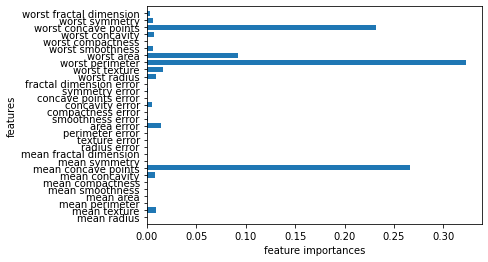

In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)